In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Data Path
path = "../../Data/DepthSmall/"

from os import listdir
from os.path import isfile, join

allfiles = [f for f in listdir(path) if isfile(join(path, f))]
allPNGNames = [f for f in allfiles if (f.find(".png") != -1)]
base_name = [allPNGNames[a][:-4] for a in range(len(allPNGNames))]

In [3]:
import re
coord_text = [re.findall("[\d]+",a) for a in base_name]
coords = np.asarray(coord_text).astype(int)
minx = min(coords[:,0])
miny = min(coords[:,1])
coordsnorm = coords - np.asarray([minx,miny])

In [4]:
x_cells = max(coords[:,0]) - min(coords[:,0])+1
y_cells = max(coords[:,1]) - min(coords[:,1])+1

In [12]:
size = 128
full_mat = np.ones((x_cells*size,y_cells*size,3))*0.5

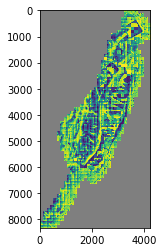

In [16]:
for a in range(len(base_name)):
    index = a
    img = plt.imread(path+allPNGNames[index])[:,:,0:3]
    img = np.rot90(img,k=3)
    x_start = coordsnorm[index][0]*size
    y_start = coordsnorm[index][1]*size
    full_mat[x_start:(x_start+size),y_start:(y_start+size),:] = img
plt.imshow(full_mat)

In [17]:
plt.imsave("fulltest.png",full_mat)